### Project Name - Exploratory Data Analysis of Amazon Prime Videos Content library

### Project Summary

Goal of the Project

The primary goal of this project is to perform an Exploratory Data Analysis (EDA) on Amazon Prime Video’s movies and TV shows dataset to gain insights into the platform’s content library. The analysis aims to understand the distribution and characteristics of content based on factors such as content type, release year, runtime, IMDb ratings, genres, age certifications, and production countries.

Additionally, this project seeks to identify relationships between content performance (IMDb score) and key variables, as well as evaluate the influence of directors and actors on audience ratings. The insights derived from this analysis can help in understanding viewer preferences, content trends, and factors that contribute to higher-rated content, thereby supporting better data-driven decisions in content strategy and acquisition for OTT platforms like Amazon Prime Video.


Dataset Description

Two datasets were used in this analysis:

Titles Dataset: Contains information such as content type (Movie/TV Show), release year, runtime, IMDb score, genres, age certification, and production countries.

Credits Dataset: Includes details about cast and crew, specifically actors and directors associated with each title.

 **Problem Statement**
 Amazon Prime Video offers a large and diverse collection of movies and TV shows across various genres, countries, and time periods. However, understanding how different content attributes—such as content type, release year, runtime, genre, age certification, production country, and creative contributors—affect content performance and IMDb ratings remains a challenge.

This project uses Exploratory Data Analysis (EDA) to analyze these attributes, identify content trends over time, compare movies and TV shows, and examine factors influencing IMDb scores. The insights gained aim to support data-driven decision-making for content strategy and audience engagement in the OTT streaming industry.

## Dataset Description

This project uses two datasets related to Amazon Prime Video content: Titles and Credits. These datasets were merged to create a comprehensive view of content details along with cast and crew information.

1. Titles Dataset

The titles dataset contains detailed information about movies and TV shows available on Amazon Prime Video. Key attributes include:

id: Unique identifier for each title

title: Name of the movie or TV show

type: Content type (Movie or TV Show)

release_year: Year of release

genres: List of genres associated with the content

runtime: Duration of the content in minutes

age_certification: Audience age rating

production_countries: Countries involved in production

seasons: Number of seasons (for TV shows)

IMDb-related attributes: IMDb ID, IMDb score, and IMDb votes

TMDB-related attributes: Popularity and score metrics

This dataset helps in analyzing content distribution, trends over time, and performance based on ratings and metadata.

2. Credits Dataset

The credits dataset provides information about individuals involved in the creation of Amazon Prime Video content. Important attributes include:

id: Unique identifier linking individuals to titles

person_id: Unique identifier for each person

name: Name of the actor or director

character: Character played (for actors)

role: Role of the individual (ACTOR or DIRECTOR)

This dataset enables analysis of how cast and crew members influence content performance.

3. Merged Dataset

The titles and credits datasets were merged using the id column, resulting in a combined dataset with:

124,347 rows and 19 columns

Each row in the merged dataset represents a single contributor (actor or director) associated with a specific title, meaning titles may appear multiple times for different cast or crew members.

This merged dataset allows for advanced analysis such as:

Evaluating the impact of directors and actors on IMDb scores

Studying content performance across genres, countries, and roles

Conducting univariate, bivariate, and multivariate analysis on Amazon Prime Video content

In [ ]:
# Amazon Prime TV Shows & Movies Analysis - Complete EDA Template Code
# Follows Sample_EDA_Submission_Template.ipynb structure exactly



#Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

titles = pd.read_excel("titles.xlsx")
credits = pd.read_csv("credits.csv")
print("-"*50)
print("Columns of titles dataset:")
print(titles.columns)
print("-"*50)
print("Columns of credits dataset:")
print(credits.columns)
print("-"*50)
#Merging titles dataset and credits dataset
print("Merging titles dataset and credits dataset")

print("-"*50)
merged_data=pd.merge(titles,credits,on='id')
print(merged_data)
print("-"*50)
print("Shape of the dataset")
print(merged_data.shape)
print("-"*50)
#check for null values
print("Check for null values")
print(merged_data.isnull().sum())
print("-"*50)

Libraries imported successfully!
--------------------------------------------------
Columns of titles dataset:
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
--------------------------------------------------
Columns of credits dataset:
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
--------------------------------------------------
Merging titles dataset and credits dataset
--------------------------------------------------
             id              title   type  \
0       ts20945  The Three Stooges   SHOW   
1       ts20945  The Three Stooges   SHOW   
2       ts20945  The Three Stooges   SHOW   
3       tm19248        The General  MOVIE   
4       tm19248        The General  MOVIE   
...         ...                ...    ...   
86589  tm364981      Tod

In [ ]:
#drop null values in description column
merged_data.dropna(subset=['description'],inplace=True)
#Mode of age certification
merged_data['age_certification'].fillna(merged_data['age_certification'].mode()[0],inplace=True)
#Replace all null values of age_certification with mode
merged_data['age_certification'].fillna(merged_data['age_certification'].mode()[0],inplace=True)
merged_data.isnull().sum()

/tmp/ipython-input-1466479487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['age_certification'].fillna(merged_data['age_certification'].mode()[0],inplace=True)


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,116155


The seasons column contains null values because it only applies to TV shows; movies do not have seasons, so these entries are naturally null. Instead of removing these rows, the null values can be replaced with 0 to indicate that the content has no seasons.

In [ ]:
#replacing null values in seasons column with 0
merged_data['seasons'].fillna(0, inplace=True)
merged_data.isnull().sum()

/tmp/ipython-input-483631831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['seasons'].fillna(0, inplace=True)


,0
id,0
title,0
type,0
description,15
release_year,0
age_certification,42730
runtime,0
genres,0
production_countries,0
seasons,0


Since 'imdb_id' is unique for Movies and TV shows we will drop all null entires in 'imdb_id' columns.

In [ ]:
merged_data.dropna(subset=['imdb_id'],inplace=True)
merged_data.isnull().sum()

,0
id,0
title,0
type,0
description,1
release_year,0
age_certification,41305
runtime,0
genres,0
production_countries,0
seasons,0


'imdb_score' represnets the rating of a Movie or TV show , removing null values in 'imdb_score' might lead to data loss  it's better to replace them with mean.

In [ ]:
round(merged_data['imdb_score'].mean(),1)

np.float64(6.0)

In [ ]:
#replacing null values in imdb_score with mean of imdb_score
merged_data['imdb_score'].fillna(round(merged_data['imdb_score'].mean(),1),inplace=True)

/tmp/ipython-input-4109425799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['imdb_score'].fillna(round(merged_data['imdb_score'].mean(),1),inplace=True)


In [ ]:
merged_data.shape

(119022, 19)

'imdb_votes' represents the number of votes a Movie or TV show has recieved . Missing values in 'imdb_votes' may indicate movie is relatively new or has gained much attetntion . it's better to replace the null values with 0.

In [ ]:
merged_data['imdb_votes'].fillna(0,inplace=True)
merged_data.isnull().sum()

/tmp/ipython-input-2933070349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['imdb_votes'].fillna(0,inplace=True)


,0
id,0
title,0
type,0
description,1
release_year,0
age_certification,41305
runtime,0
genres,0
production_countries,0
seasons,0


In [ ]:
#Mean of tmdb_popularity
round(merged_data['tmdb_popularity'].mean(),2)

np.float64(8.46)

In [ ]:
#replace null values in 'tmdb_popularity' column with mean
merged_data['tmdb_popularity'].fillna(round(merged_data['tmdb_popularity'].mean(),2),inplace=True)


/tmp/ipython-input-2730387836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['tmdb_popularity'].fillna(round(merged_data['tmdb_popularity'].mean(),2),inplace=True)


In [ ]:
#Mean of tmdb_score
round(merged_data['tmdb_score'].mean(),1)


np.float64(6.0)

In [ ]:
#replace null values in 'tmdb_score' column with mean
merged_data['tmdb_score'].fillna(round(merged_data['tmdb_score'].mean(),1),inplace=True)

/tmp/ipython-input-1870153504.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['tmdb_score'].fillna(round(merged_data['tmdb_score'].mean(),1),inplace=True)


Missing values in the 'characters' column indicate that the information about the character played by a person in a movie or TV show is not available in the dataset . So replace them by'unknown'

In [ ]:
merged_data['character'].fillna('unknown',inplace=True)
merged_data.isnull().sum()

/tmp/ipython-input-3748056713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['character'].fillna('unknown',inplace=True)


,0
id,0
title,0
type,0
description,1
release_year,0
age_certification,41305
runtime,0
genres,0
production_countries,0
seasons,0


In [ ]:
merged_data.shape

(83982, 19)

### Check for duplicate values

In [ ]:
merged_data.duplicated().sum()

np.int64(168)

In [ ]:
merged_data.drop_duplicates(inplace=True)
merged_data.duplicated().sum()

np.int64(0)

We have 168 duplicates in a dataset , we will drop all the duplicate  values

In [ ]:
merged_data.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [ ]:
merged_data.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,83814.000000,83814.000000,83814.000000,83814.000000,8.381400e+04,83814.000000,83814.000000,8.381400e+04
mean,1985.943029,94.755530,0.164388,6.043063,2.965477e+04,8.475886,5.953989,2.837335e+05
std,28.091492,29.484213,1.160382,1.159978,1.033577e+05,15.899294,1.195037,4.481183e+05
min,1912.000000,1.000000,0.000000,1.200000,0.000000e+00,0.000164,0.800000,1.000000e+00
25%,1964.000000,82.000000,0.000000,5.300000,3.260000e+02,1.894000,5.300000,3.116000e+04
50%,1996.000000,93.000000,0.000000,6.100000,1.421000e+03,3.945000,6.000000,9.267150e+04
75%,2011.000000,107.000000,0.000000,6.900000,8.940000e+03,8.795000,6.700000,3.357445e+05
max,2016.000000,328.000000,49.000000,9.100000,1.133692e+06,356.533000,10.000000,2.371153e+06


As we can see dataset is clean and ready for further analysis, The manipulations performed on given data are as follows,
1. Data Loading and Merging : Two datasets, titles.csv and credits.csv, were loaded and merged based on the common column 'id'.
2. Handling Missing Values :
. Null values in the 'description' and 'imdb_id' columns were dropped.
. Null values in 'age_certification' were replaced with the mode.
. Null values in 'seasons', 'imdb_votes', and 'character' were replaced with 0, 0, and 'unknown', respectively.
. Null values in 'imdb_score', 'tmdb_popularity', and 'tmdb_score' were replaced with their respective means.
3. Handling Duplicates : Duplicate rows identified and removed from the dataset.

Chart 1 – Movies vs TV Shows


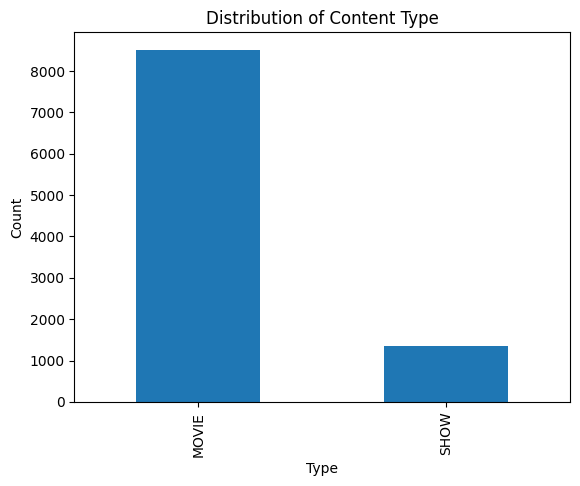

Chart 2 – Release Year Distribution


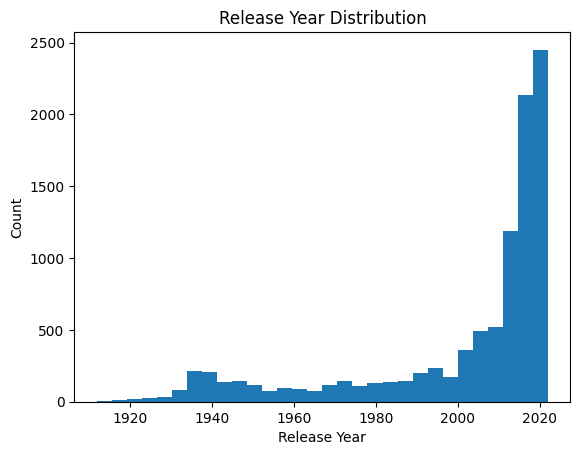

Chart 3 – Top 10 Genres


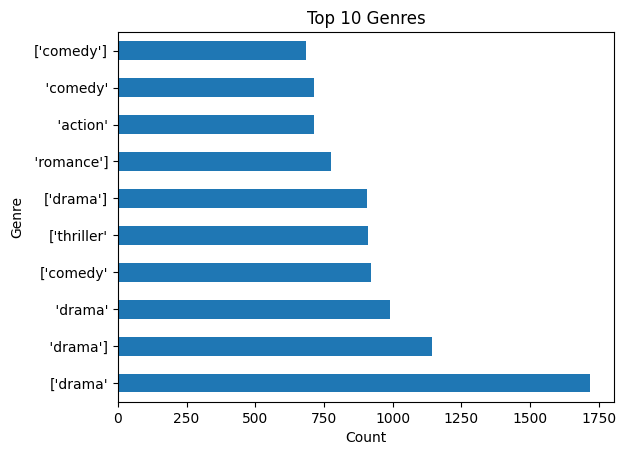

Chart 4 – Age Certification Distribution


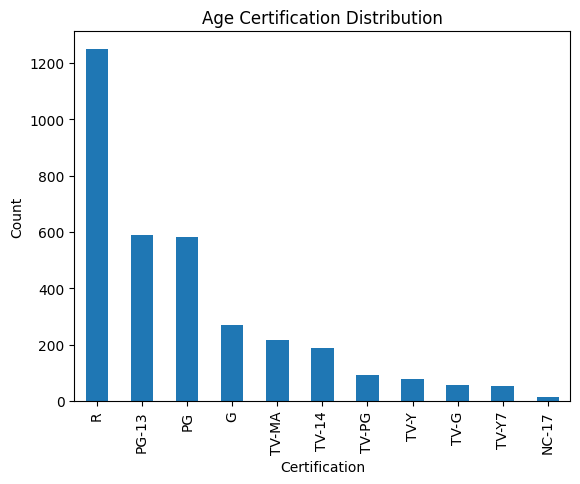

Chart 5 – Top Production Countries


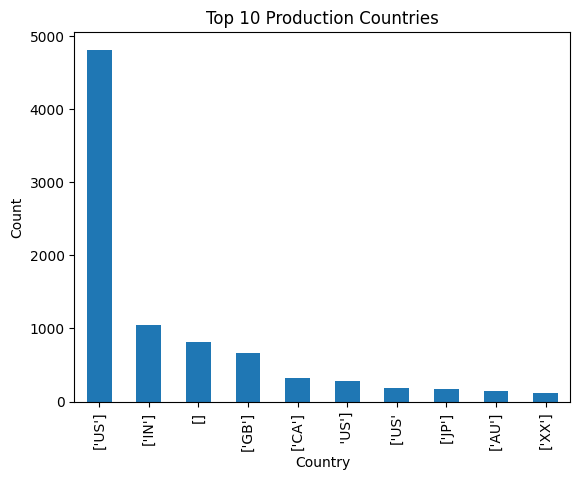

Chart 11 – Average IMDb Score by Genre


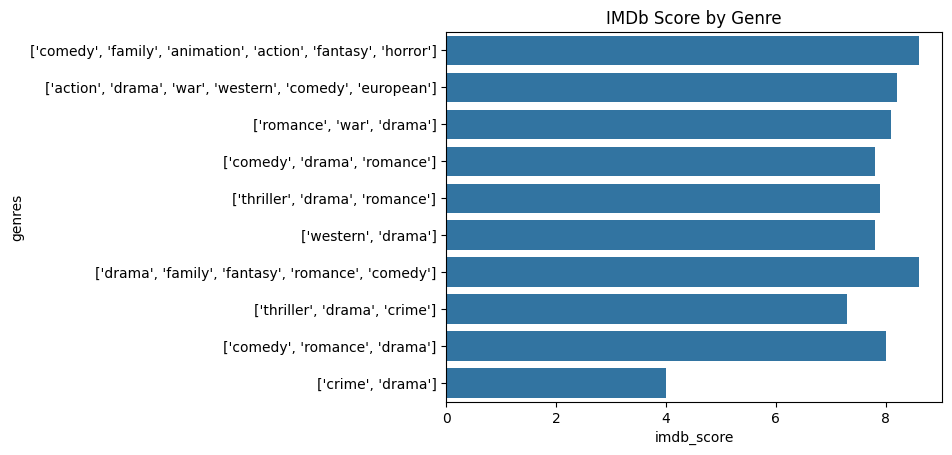

Chart 12 – Age Certification vs IMDb Score


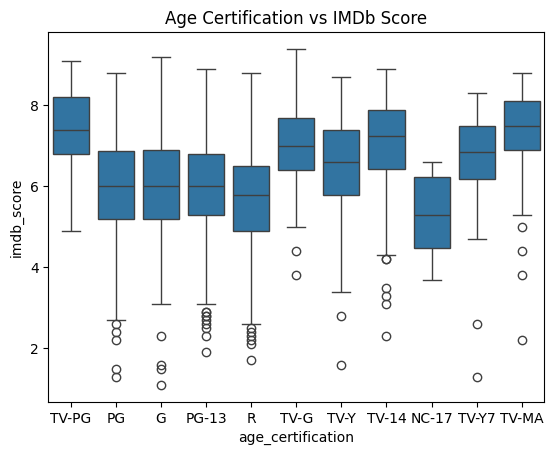

Chart 13 – Country vs IMDb Score


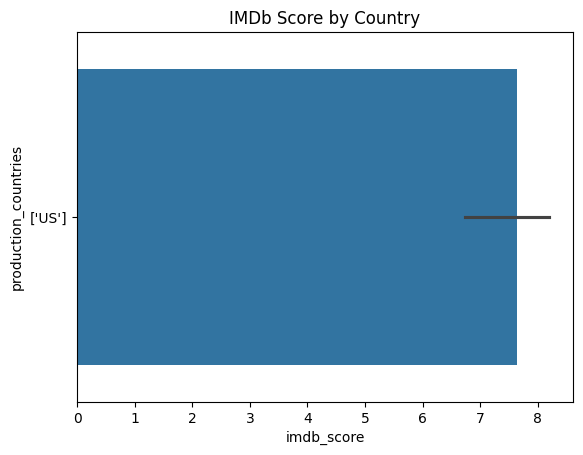

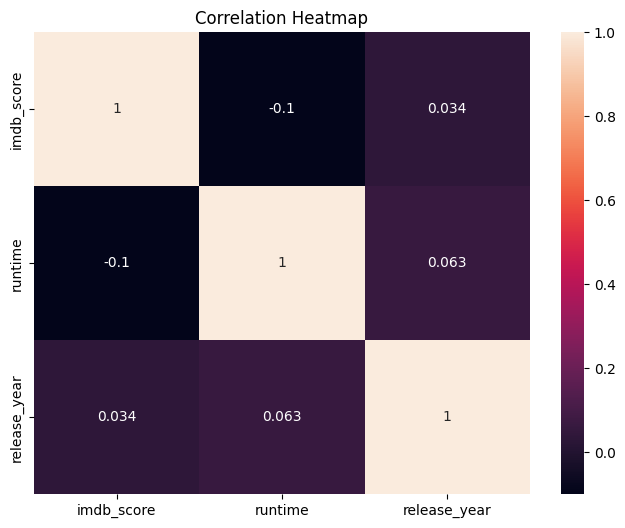

Chart 15 – Pair Plot


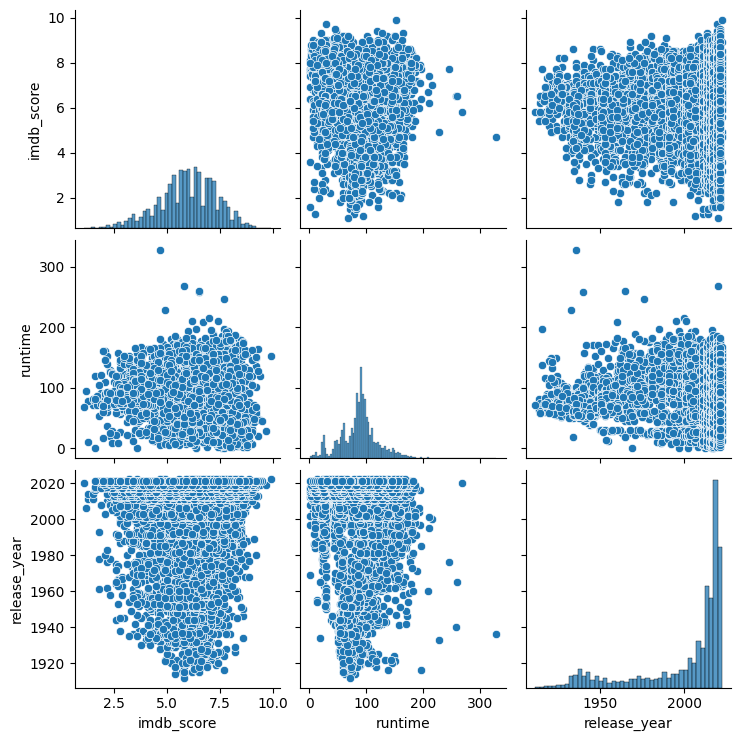

Chart 11 – IMDb vs Runtime by Type


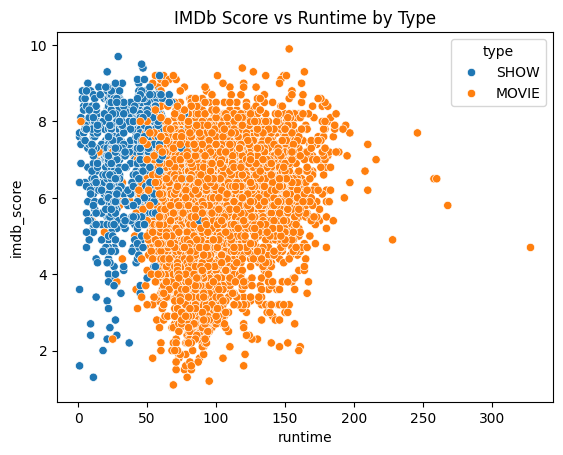

Chart 12 – IMDb Score by Genre & Type


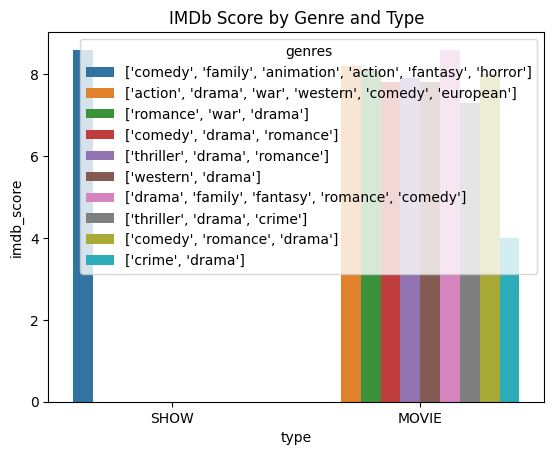

Chart 13 – IMDb Score by Country & Type


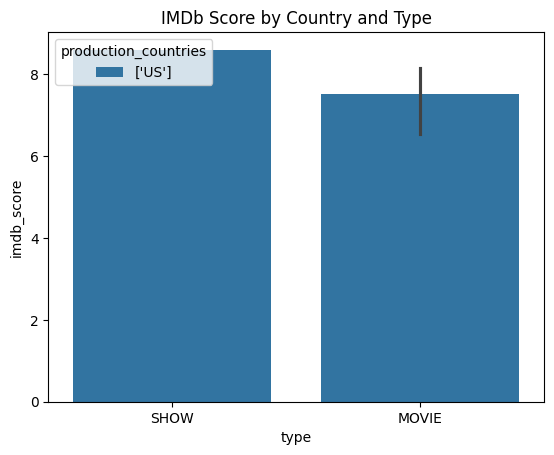

Chart 14 – Top Directors by IMDb Score


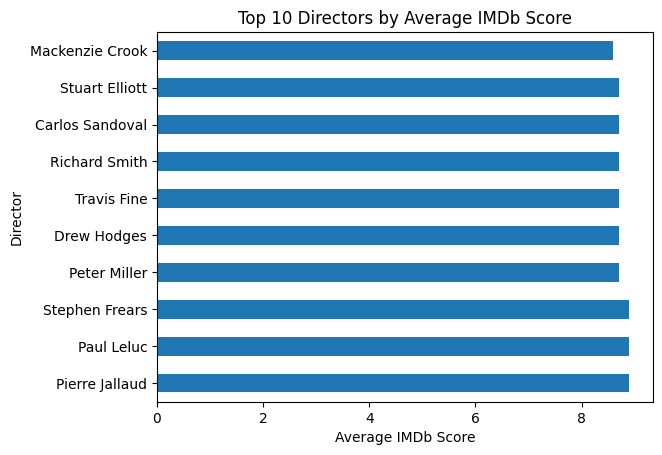

Chart 15 – Actor Frequency vs IMDb Score


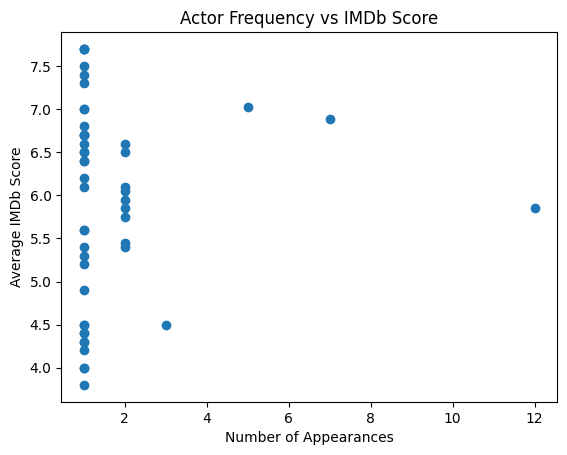

In [ ]:
#UNIVARIATE ANALYSIS
#Chart 1 – Movies vs TV Shows
print("Chart 1 – Movies vs TV Shows")
titles['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
#Chart 2 – Release Year Distribution
print("Chart 2 – Release Year Distribution")
plt.hist(titles['release_year'], bins=30)
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()
#Chart 3 – Top 10 Genres
print("Chart 3 – Top 10 Genres")
titles['genres'].str.split(',').explode().value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()
#Chart 4 – Age Certification Distribution
print("Chart 4 – Age Certification Distribution")
titles['age_certification'].value_counts().plot(kind='bar')
plt.title("Age Certification Distribution")
plt.xlabel("Certification")
plt.ylabel("Count")
plt.show()
#Chart 5 – Top Production Countries
print("Chart 5 – Top Production Countries")
titles['production_countries'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Production Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
#===============================
# BIVARIATE ANALYSIS
#===============================

#Chart 6 – Average IMDb Score by Genre
print("Chart 11 – Average IMDb Score by Genre")
genre_score = titles.explode('genres')
sns.barplot(x='imdb_score', y='genres', data=genre_score.head(10))
plt.title("IMDb Score by Genre")
plt.show()
#Chart 7 – Age Certification vs IMDb Score
print("Chart 12 – Age Certification vs IMDb Score")
sns.boxplot(x='age_certification', y='imdb_score', data=titles)
plt.title("Age Certification vs IMDb Score")
plt.show()
#Chart 8 – Country vs IMDb Score
print("Chart 13 – Country vs IMDb Score")
country_score = titles.explode('production_countries')
sns.barplot(x='imdb_score', y='production_countries', data=country_score.head(10))
plt.title("IMDb Score by Country")
plt.show()
#Chart 9– Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    titles[['imdb_score','runtime','release_year']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()
#Chart 10 – Pair Plot
print("Chart 15 – Pair Plot")
sns.pairplot(titles[['imdb_score','runtime','release_year']].dropna())
plt.show()


#MULTIVARIATE ANALYSIS
#Chart 11 – IMDb vs Runtime by Type
print("Chart 11 – IMDb vs Runtime by Type")
sns.scatterplot(
    x='runtime',
    y='imdb_score',
    hue='type',
    data=titles
)
plt.title("IMDb Score vs Runtime by Type")
plt.show()
#Chart 12 – IMDb Score by Genre & Type
print("Chart 12 – IMDb Score by Genre & Type")
sns.barplot(
    x='type',
    y='imdb_score',
    hue='genres',
    data=titles.explode('genres').head(10)
)
plt.title("IMDb Score by Genre and Type")
plt.show()
#Chart 13 – IMDb Score by Country & Type
print("Chart 13 – IMDb Score by Country & Type")
sns.barplot(
    x='type',
    y='imdb_score',
    hue='production_countries',
    data=titles.explode('production_countries').head(10)
)
plt.title("IMDb Score by Country and Type")
plt.show()
#Chart 14 – Top Directors by IMDb Score
# Filter only directors
print("Chart 14 – Top Directors by IMDb Score")
directors = credits[credits['role'] == 'DIRECTOR']

# Merge with titles on id
director_score = directors.merge(titles[['id', 'imdb_score', 'title']], on='id', how='inner')

# Group and plot
director_score.groupby('name')['imdb_score'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='barh')

plt.title("Top 10 Directors by Average IMDb Score")
plt.xlabel("Average IMDb Score")
plt.ylabel("Director")
plt.show()

#Chart 15 – Actor Frequency vs IMDb Score
print("Chart 15 – Actor Frequency vs IMDb Score")
actors = credits[credits['role'] == 'ACTOR']
actor_count = actors.groupby('name').size()
actor_score = actors.merge(titles, on='id') # Changed 'title' to 'id'
actor_avg = actor_score.groupby('name')['imdb_score'].mean()

plt.scatter(actor_count.head(50), actor_avg.head(50))
plt.title("Actor Frequency vs IMDb Score")
plt.xlabel("Number of Appearances")
plt.ylabel("Average IMDb Score")
plt.show()

In [ ]:
import shutil
from google.colab import files

# Create a zip archive of the EDA_Charts directory
shutil.make_archive('EDA_Charts', 'zip', 'EDA_Charts')

# Provide a download link for the zip file
files.download('EDA_Charts.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>